**국제 금가격 (USD 기준) - 런던 금시장, LBMA**

파이썬 라이브러리 임포트

In [1]:
!pip install 


ERROR: You must give at least one requirement to install (see "pip help install")


In [2]:
import quandl 

In [3]:
import getpass

In [4]:
#시각화 툴
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['axes.grid'] = True

In [5]:
import pandas as pd
import datetime
import json
import quandl
quandl.ApiConfig.api_key="V8G4N34BkNfEFzWUbk4v"

국제 금 가격

In [27]:
df_gold = quandl.get("LBMA/GOLD", start_date="1999-12-30", end_date='2023-04-29', collapse="first", freq='MS')

In [28]:
df_gold.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
1999-12-30,290.85,290.25,180.093,179.610,289.547,289.094
2000-01-04,282.05,281.50,172.166,171.929,275.305,272.402
2000-01-05,282.10,280.45,171.729,170.808,272.035,270.470
2000-01-06,280.35,279.40,170.446,169.518,270.974,269.152
2000-01-07,282.00,282.10,171.324,172.065,273.840,274.017


In [29]:
df_gold.tail()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2023-04-24,1986.15,1978.20,1594.48,1588.89,1802.23,1794.43
2023-04-25,1990.20,1987.40,1596.54,1601.65,1803.12,1806.75
2023-04-26,1999.05,2003.00,1602.84,1603.40,1809.74,1807.31
2023-04-27,1997.65,1985.65,1602.91,1592.69,1808.47,1802.57
2023-04-28,1982.70,1982.55,1591.32,1585.25,1804.26,1803.33


In [30]:
df_gold_monthly = df_gold.resample('M').mean().shift(1,freq='D')

In [31]:
df_gold_monthly.head()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2000-01-01,290.850000,290.250000,180.093000,179.610000,289.547000,289.094000
2000-02-01,284.590000,284.315000,173.378950,173.291100,280.439200,280.573400
2000-03-01,300.854762,299.864286,187.854476,187.397952,305.497476,304.846905
2000-04-01,286.704348,286.389130,181.519217,181.286435,297.007826,296.838739
2000-05-01,279.961111,279.694444,176.773167,176.626000,295.334667,295.449556


In [32]:
df_gold_monthly.tail()

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
2023-01-01,1794.237500,1796.741667,1473.023000,1471.583889,1695.669000,1697.156667
2023-02-01,1897.704762,1898.628571,1552.836667,1552.587143,1760.539048,1761.293810
2023-03-01,1858.107500,1854.540000,1536.348500,1534.154000,1733.581500,1732.381000
2023-04-01,1908.586957,1912.730435,1572.653043,1575.045652,1782.924348,1785.516087
2023-05-01,1998.841667,2000.416667,1606.074444,1606.617222,1821.956111,1822.537222


In [33]:
df_usd_pm = df_gold_monthly.loc[:, 'USD (PM)']
df_usd_pm.name = 'Gold_close'
print(df_usd_pm)

Date
2000-01-01     290.250000
2000-02-01     284.315000
2000-03-01     299.864286
2000-04-01     286.389130
2000-05-01     279.694444
                 ...     
2023-01-01    1796.741667
2023-02-01    1898.628571
2023-03-01    1854.540000
2023-04-01    1912.730435
2023-05-01    2000.416667
Name: Gold_close, Length: 281, dtype: float64


In [13]:
df_usd_pm.index = df_usd_pm.index.to_period('M').strftime('%Y-%m')

In [14]:
Gold_close_1 = pd.DataFrame(df_usd_pm)
print(Gold_close_1)

          Gold_close
Date                
2000-01   290.250000
2000-02   284.315000
2000-03   299.864286
2000-04   286.389130
2000-05   279.694444
...              ...
2023-01  1796.741667
2023-02  1898.628571
2023-03  1854.540000
2023-04  1912.730435
2023-05  2000.416667

[281 rows x 1 columns]


In [15]:
pd.DataFrame(Gold_close_1)

,Gold_close
Date,
2000-01,290.250000
2000-02,284.315000
2000-03,299.864286
2000-04,286.389130
2000-05,279.694444
...,...
2023-01,1796.741667
2023-02,1898.628571
2023-03,1854.540000


<Axes: xlabel='Date'>

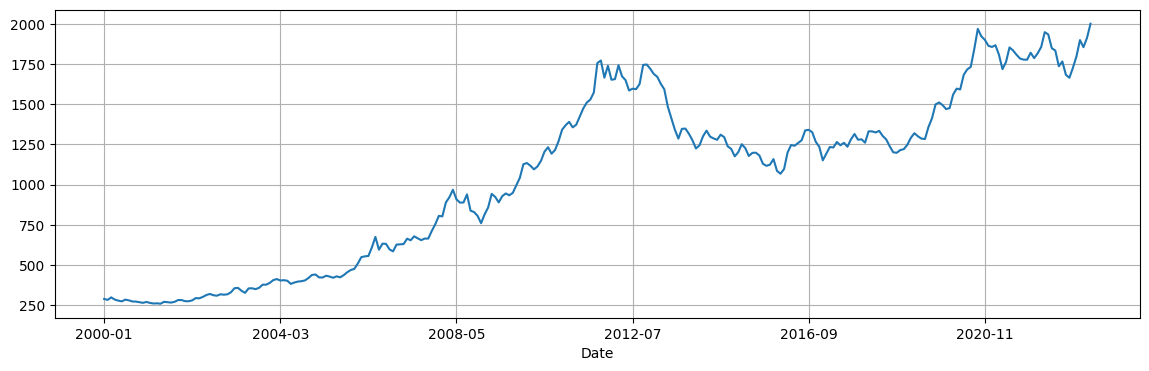

In [16]:
df_usd_pm.plot()

<Axes: xlabel='Date'>

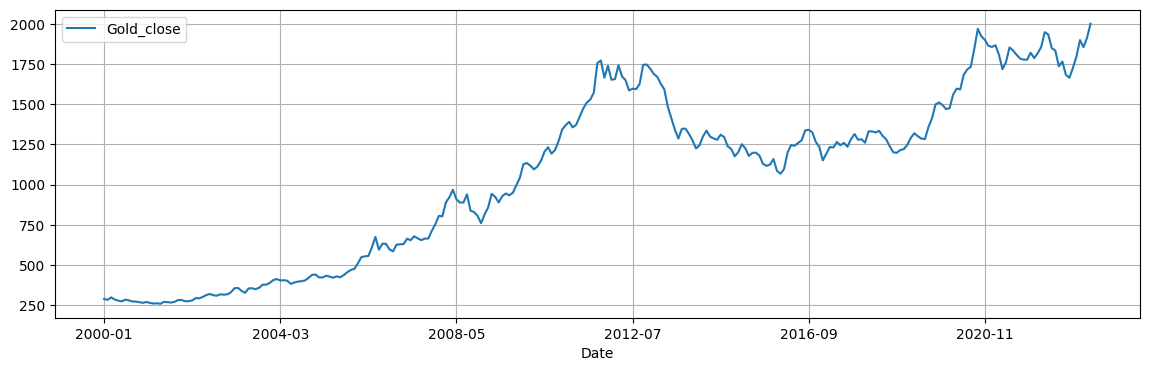

In [17]:
Gold_close_1.plot()

In [18]:
import os
os.getcwd()

'/content'

In [19]:
!ls 

Gold.csv  sample_data


In [20]:
file_path ="Gold.csv"
Gold_close_1.to_csv(file_path, index=True)